# <a id="#">Task 2 – Image IO, Histograms, Intensity clipping</a>

In [62]:
import numpy
import matplotlib.pyplot as plt

---

## Image IO

**<a id="#">Task 2.1.</a>** Enter your solution below:

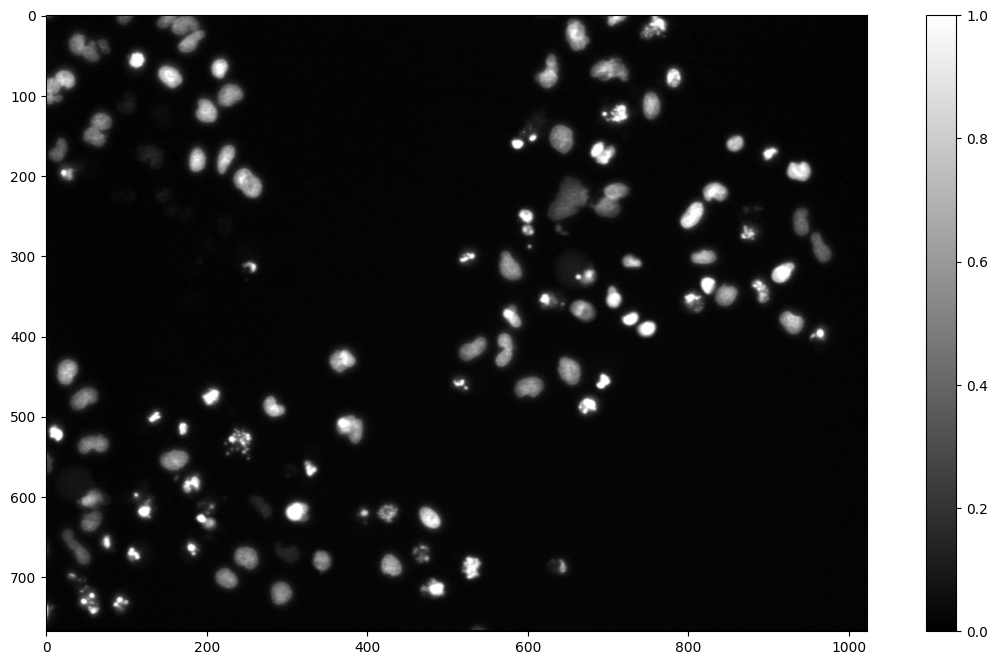

In [63]:
img = plt.imread('data/cells.png')  #Das importierte Bild heißt jetzt 'img'
plt.figure(figsize=(15, 8))         #Damit kann man verändern wie groß das Bild auf dem Display angezeigt wird
plt.imshow(img, 'grey')             #Damit kann man die Farbe des Bildes verändern, bsp.: pink
plt.colorbar()                      #Zeig an der Seite den Farbbalken an

---

## Histograms

**<a id="#">Task 2.2.</a>** Enter your solution below:

(array([705771.,  23593.,  12589.,  10115.,   9097.,   7896.,   5675.,
          3669.,   2568.,   5459.]),
 array([0.        , 0.1       , 0.2       , 0.30000001, 0.40000001,
        0.5       , 0.60000002, 0.69999999, 0.80000001, 0.89999998,
        1.        ]),
 <BarContainer object of 10 artists>)

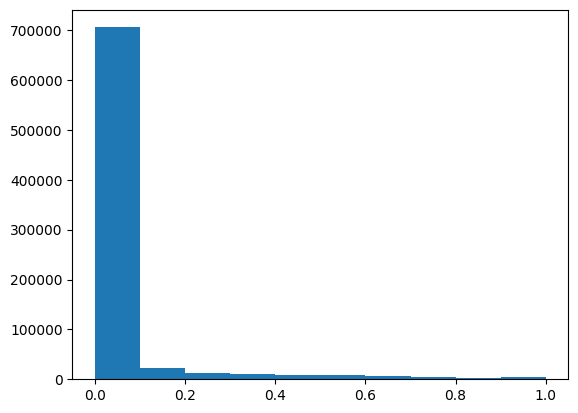

In [64]:
plt.hist(img.flatten()) #Histogramm von Pixelintensitäten des Bildes wird erstellt, das Histogramm kann nur von einem eindimensionalen Array erstellen, deswegen flattet man um von 2D zu 1D zu kommen


---

## Intensity clipping

First we define some fixed thresholds $T_1$, $T_2$:

In [65]:
T1 = 0.31
T2 = 0.59

### Using `ndarray.clip` method

**<a id="#">Task 2.3.1.</a>** Enter your solution below:

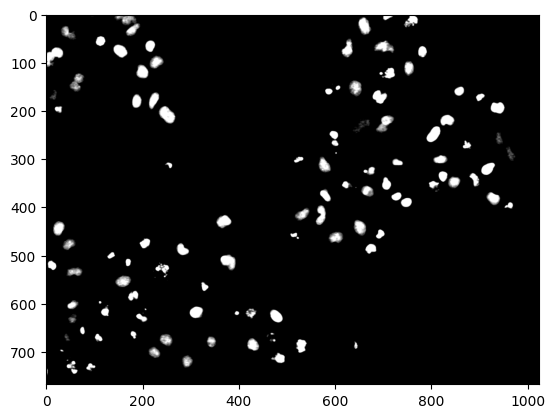

In [66]:
imgclipped = img.clip(T1, T2)
plt.imshow(imgclipped, 'grey')  #vor der imshow function muss plt. stehen, weil die funktion in modul plt importiert wurde ( siehe erste Zelle)

### Not using the `ndarray.clip` method

**<a id="#">Task 2.3.2 (a).</a>** Enter your solution below:

In [67]:
type(img)
print(img.ndim)  #wenn ich die dimensiond von imgclipped haben will: imgclipped.ndim
print(img.shape[0]) #image hight = row
print(img.shape[1]) #image width = column

2
768
1024


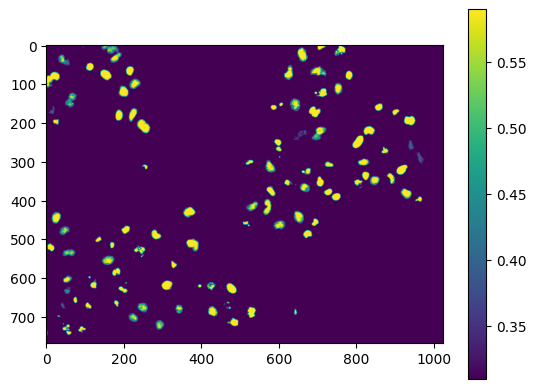

In [68]:
T1 = 0.31
T2 = 0.59

imgclppd = img.copy()

for i in range(0, 768):             #über alle row iterieren            Erkenntnis: in python gibt es row 0 und column 0
    for j in range(0, 1024):        #über alle column iterieren
        if img[i,j] < T1:
           imgclppd[i,j] = T1
        elif img[i,j] > T2:            #elif und NICHT elseif oder else if!
           imgclppd[i,j] = T2
        else:                               #das else braucht man in diesem fall gar nicht
            imgclppd[i,j] = img[i,j]
plt.imshow(imgclppd)   
            
plt.colorbar()
        
        

**<a id="#">Task 2.3.2 (b).</a>** Enter your solution below:

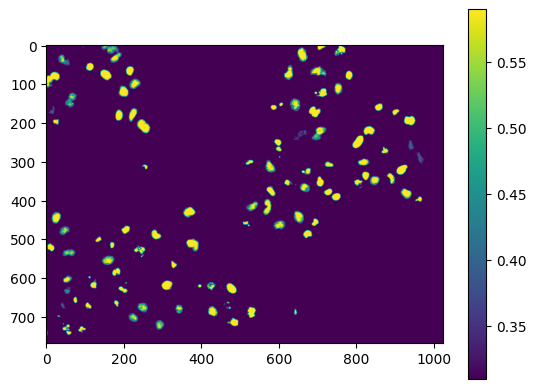

In [69]:
imgclppdn = img.copy()

for i in numpy.ndindex(img.shape):      #in diesem fall befinden sich hinter i zwei zahlen (row and column), deswegen auch img[i] und NICHT img[i,i]
        if img[i] < T1:
           imgclppdn[i] = T1
        elif img[i] > T2:            
           imgclppdn[i] = T2
        else:                               #das else braucht man in diesem fall gar nicht
            imgclppdn[i] = img[i]
plt.imshow(imgclppdn)   
            
plt.colorbar()

---

## Writing re-usable code (bonus)

**<a id="#">Task 2.3.4.</a>** Finish the implementation of the function `clip_image` below, by replacing the comment line (the one which starts with `#`) with your code:

array([[0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       ...,
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5]], dtype=float32)

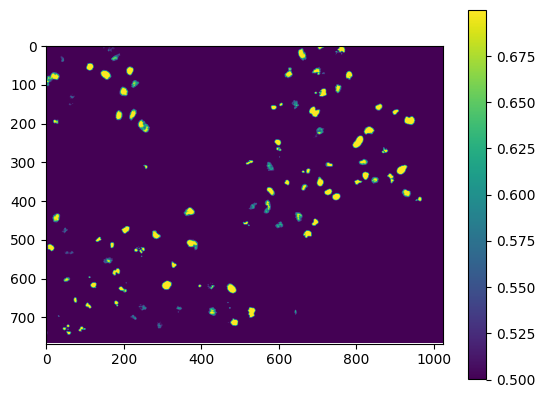

In [73]:
def clip_image(img, T1, T2):                #die erstellte funktion heißt jetzt "clip_image"
    image_clipped = img.copy()
    for i in numpy.ndindex(img.shape):      #in diesem fall befinden sich hinter i zwei zahlen (row and column), deswegen auch img[i] und NICHT img[i,i]
        if img[i] < T1:
            image_clipped[i] = T1
        elif img[i] > T2:            
                image_clipped[i] = T2
        else:                               #das else braucht man in diesem fall gar nicht
                image_clipped[i] = img[i]
    plt.imshow(image_clipped)               
    plt.colorbar()
    return image_clipped

clip_image(img, 0.5, 0.7)


**Hints:**
1. The implementation of the function starts after the `def`-line. Any instructions written *(i)* below this line and *(ii)* indented to the right will be run *from top to bottom* whenever you use this function. The execution of the function ends when the last instruction is reached or a `return` statement is encountered.
2. The purpose of the function `clip_image` is that it takes an *input* image `img` (along with two thresholds) and returns an *output* image (the clipped image). Make sure that you do *not* change the original input image!

We are going to check that the solution produced by `clip_img` equals the solution `ndarray.clip` produces. If the image you have loaded is not referenced by the variable `img` in your solution for **Task 2.1**, replace `img` by the name of the variable you used to reference the loaded image:

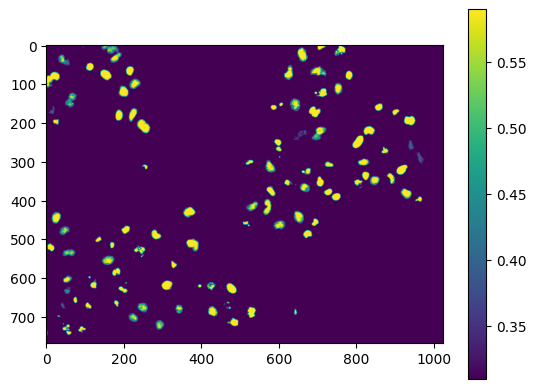

In [74]:
assert (clip_image(img, T1, T2) == img.clip(T1, T2)).all()  #wenn assert true ist, passiert nichts. wenn assert false ist, würde eine meldung kommen. Bild wird immer ausgegeben.

Now, we are going to show the clipping results produced using your `clip_image` implementation for different thresholds (`T1`, `T2`). The code below already shows the results for a pair of *two* thresholds. Supplement the code by adding the result for a *third* pair of thresholds!

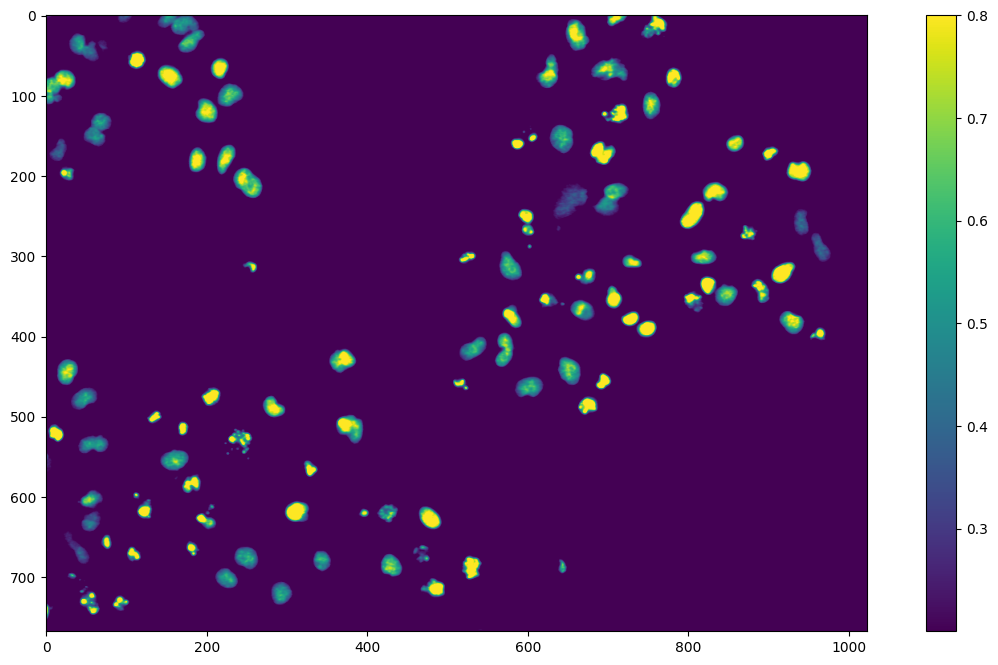

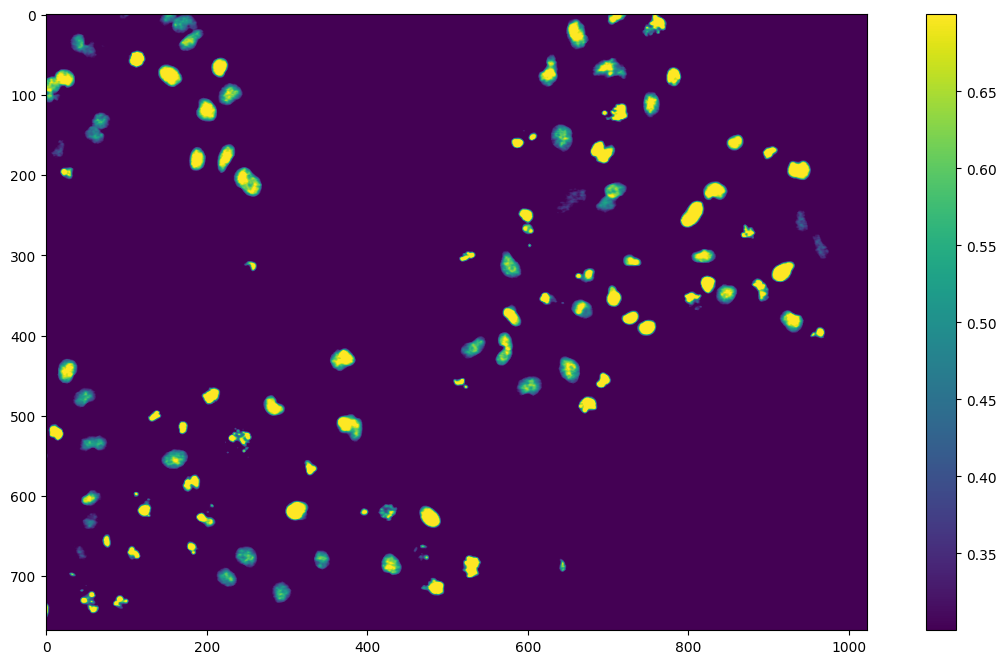

In [75]:
plt.figure(figsize=(15,8))
plt.imshow(clip_image(img, 0.2, 0.8))

plt.figure(figsize=(15,8))
plt.imshow(clip_image(img, 0.3, 0.7))

# here goes your code